# SiO2 reflectivity

SiO2 ~100 nm

on Al2O3 wafer

sample length 5 mm

measured at a CuKalpha source

beam width ~0.05 mm

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

## load data

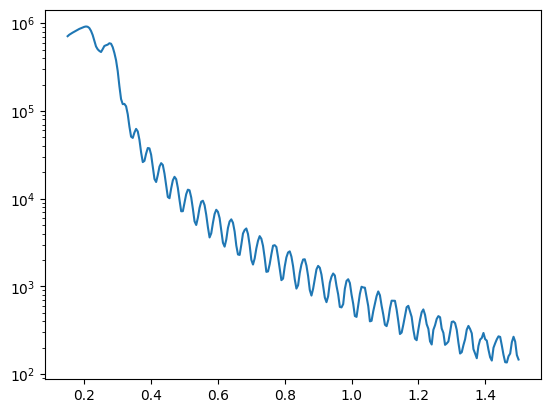

In [2]:
# data are saved as theta and intensity in column 0 and 1

angles_data, intensity_data = nx.data.Load('SiO2_refl.txt',
                                           x_index = 0,
                                           intensity_index = 1,
                                           # x_start=None,
                                           # x_stop=None,
                                           # intensity_threshold=None
                                           )

plt.semilogy(angles_data, intensity_data)
plt.show()

## sample

In [3]:
# fit parameters

#SiO2
t_SiO2 = nx.Var(100, min = 90, max = 110, fit = True, id = "t SiO2")
d_SiO2 = nx.Var(2.65, min = 2.0, max = 2.65, fit = True, id = "d SiO2")
r_SiO2 = nx.Var(0.2, min = 0.05, max = 2.0, fit = True, id = "r SiO2")

#substrate
r_subs = nx.Var(0.1, min = 0.05, max = 0.4, fit = True, id = "r subs")


SiO2 = nx.Material(id = "SiO2",
                   composition = [("Si", 1), ("O", 2)],
                   density = d_SiO2
                  )

lay_SiO2 = nx.Layer(id = "lay SiO2",
                    material = SiO2,
                    thickness = t_SiO2,
                    roughness = r_SiO2
                   )

# silicon substrate
substrate = nx.Layer(id = "Si substrate",
                     material = nx.Material.Template(nx.lib.material.Al2O3),
                     thickness = nx.inf,      # set the substrate to infinite thickness
                     roughness = r_subs
                    )

# define sample
# in grazing incidence the beam profile and the sample length get important
sample = nx.Sample(layers = [lay_SiO2,
                             substrate],  # define layers from top to bottom
                   geometry = "r",        # set the sample geometry to reflectivity
                   roughness = "a",       # analytical roughness model          
                   length = 5            # in mm
                  )

## experiment

In [4]:
beam_fwhm = nx.Var(0.03, min = 0.02, max = 0.06, fit = True, id = "b fwhm")

beam = nx.Beam(profile = 'g',        # Gaussian beam profile
               fwhm = beam_fwhm      # FWHM of the beam in the scattering plane, in mm
              )     

exp = nx.Experiment(beam = beam,
                    objects = [sample]
                   )

## reflectivity

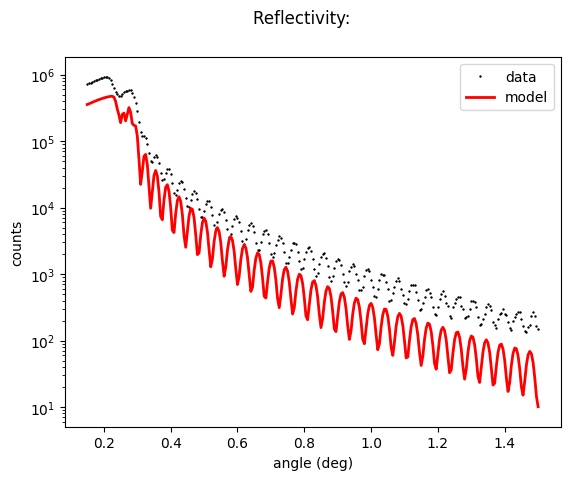

In [5]:
res = nx.Var(0.01, min = 1e-7, max = 0.02, fit = True, id = "resolution")

reflectivity = nx.Reflectivity(experiment = exp,
                               sample = sample,                   # sample in the experiment for the reflectivity calculation
                               energy = nx.lib.energy.CuKalpha,   # Cu K alpha line
                               angles = angles_data,              # loaded dataset
                               intensity_data = intensity_data,   # loaded dataset
                               # scaling = 'auto',
                               # background = 0.0,
                               # offset = 0.0,
                               resolution = res,
                               # residual = nx.lib.residual.Log10()   # or change to another nx.lib.residual. method
                              )

reflectivity()
reflectivity.Plot()

## fit

In [6]:
fit = nx.Fit(id = "fit reflectivity",
             measurements = [reflectivity]
             # external_fit_variables = []    # for advanced fitting
             # einequalities = None           # for advanced fitting
            )

fit.options.file_output = False          # no putput file is generated for fit
fit.options.method = "PagmoDiffEvol"     # or any other method of choice

# for refelctivities it is often good to increase the iterations of global methods
fit.options.iterations = 200

fit.Evaluate()


Run Fit instance with id: fit reflectivity 

Starting fit with 1 measurement data set(s) and 7 fit parameter(s):

  no. |                           id |       initial value |              min |              max
    0 |                 Refl scaling |              916932 |                0 |      9.16932e+07
    1 |                   resolution |                0.01 |            1e-07 |             0.02
    2 |                       b fwhm |                0.03 |             0.02 |             0.06
    3 |                       t SiO2 |                 100 |               90 |              110
    4 |                       r SiO2 |                 0.2 |             0.05 |                2
    5 |                       d SiO2 |                2.65 |                2 |             2.65
    6 |                       r subs |                 0.1 |             0.05 |              0.4

Using 0 equality constraint(s) on parameter(s):

Using 0 inequality constraint(s).


Calling Pagmo solver wi

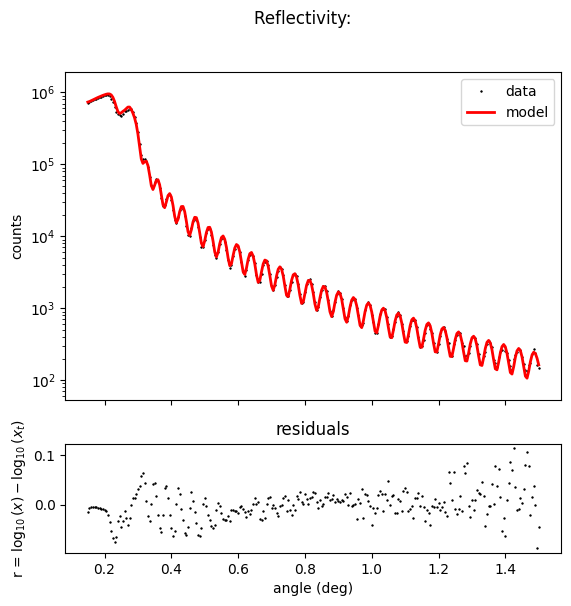

In [7]:
reflectivity.Plot()